In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [18]:
sns.set_style('whitegrid')
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import math



In [19]:
import yfinance as yf

yf.pdr_override()


In [20]:
stocks_list = ['AMZN', 'DPZ', 'BTC', 'NFLX']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in stocks_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AMZN, DPZ, BTC, NFLX]
company_name = ["AMAZON", "DPZLE", "BTC", "NETFLIX"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-04,621.559998,624.419983,615.080017,615.830017,615.830017,3020300,NETFLIX
2024-03-05,610.099976,610.909973,592.000000,598.500000,598.500000,3849600,NETFLIX
2024-03-06,602.989990,607.929993,593.559998,597.690002,597.690002,2469600,NETFLIX
2024-03-07,599.340027,610.530029,595.900024,608.510010,608.510010,2742800,NETFLIX
2024-03-08,608.270020,616.090027,600.840027,604.820007,604.820007,2774600,NETFLIX
2024-03-11,608.080017,611.000000,600.369995,600.929993,600.929993,2500900,NETFLIX
2024-03-12,600.210022,615.299988,596.270020,611.080017,611.080017,2821600,NETFLIX
2024-03-13,613.369995,614.849976,607.210022,609.450012,609.450012,2192100,NETFLIX
2024-03-14,615.000000,620.799988,607.349976,613.010010,613.010010,3120500,NETFLIX


In [21]:
AMZN.describe()


,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,125.084084,126.858308,123.321055,125.149348,125.149348,6.397086e+07
std,23.652620,23.670617,23.687027,23.717531,23.717531,2.726039e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.237840e+07
25%,104.190002,106.169998,102.519997,104.640003,104.640003,4.723890e+07
50%,125.309998,127.370003,124.019997,125.928497,125.928497,5.673500e+07
75%,141.670006,143.470001,139.875000,142.160004,142.160004,7.184150e+07
max,177.690002,180.139999,177.490005,178.750000,178.750000,2.726620e+08


In [22]:
AMZN.head(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-03-16,148.500000,153.149994,147.353500,153.104004,153.104004,84958000,AMAZON
2022-03-17,152.640503,157.498505,152.139999,157.238998,157.238998,72934000,AMAZON
2022-03-18,156.813004,161.593994,156.011002,161.250504,161.250504,102962000,AMAZON
2022-03-21,161.121002,163.084000,159.552994,161.491501,161.491501,66538000,AMAZON
2022-03-22,161.805496,166.167007,161.699005,164.889008,164.889008,64086000,AMAZON


In [23]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2022-03-16 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   company_name  503 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


In [24]:
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

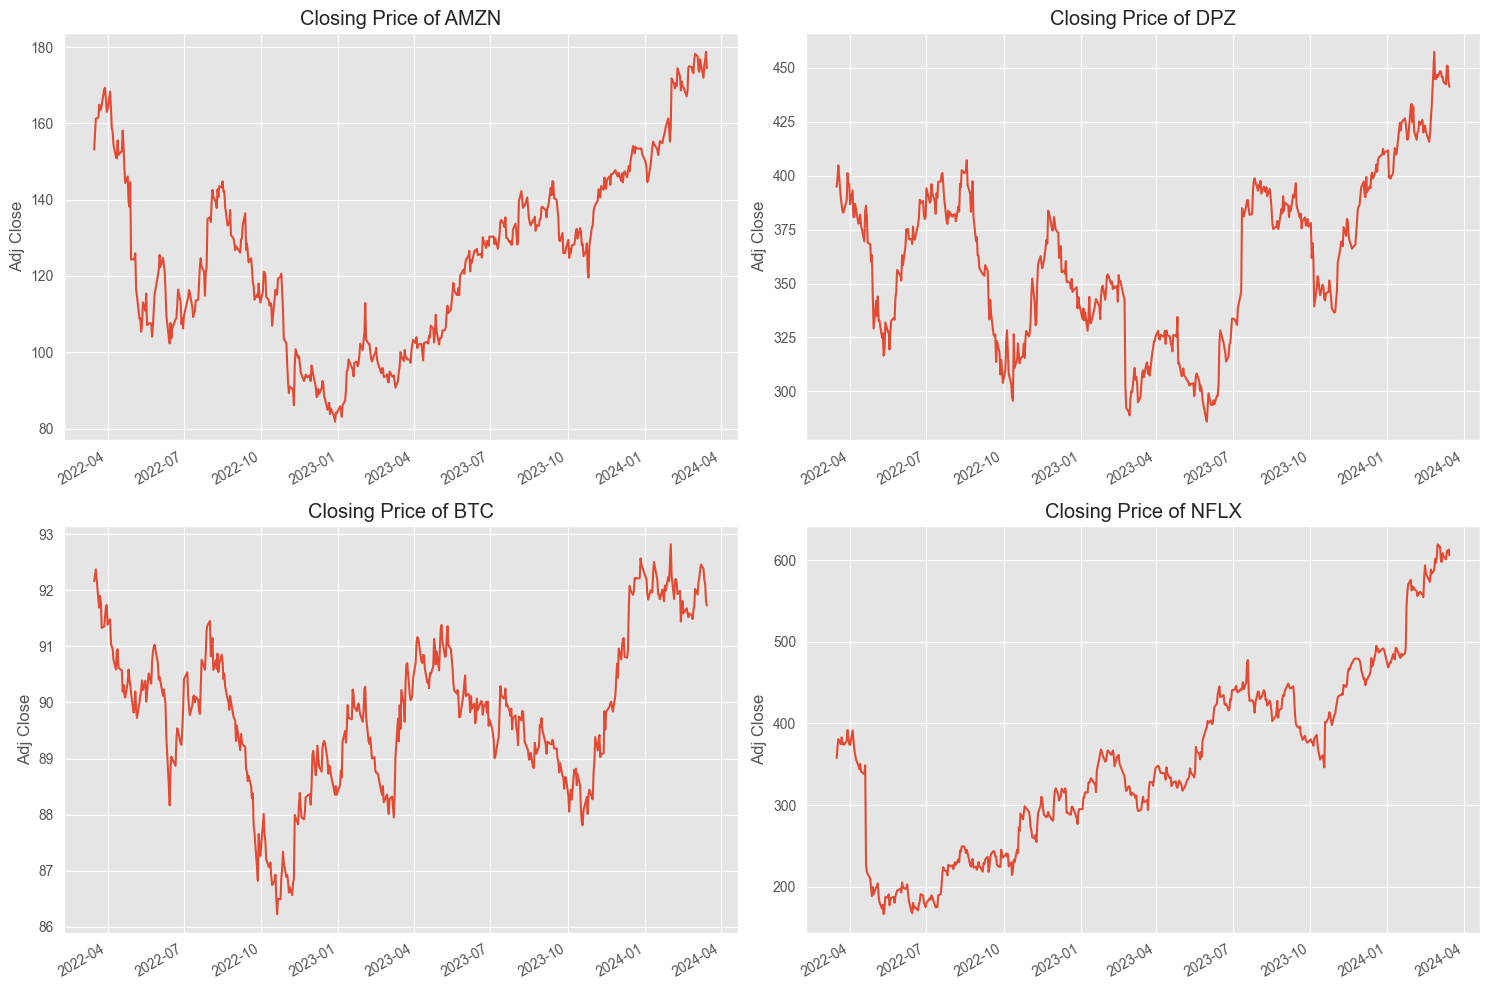

In [25]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks_list[i - 1]}")
    plt.grid(True)
    
plt.tight_layout()

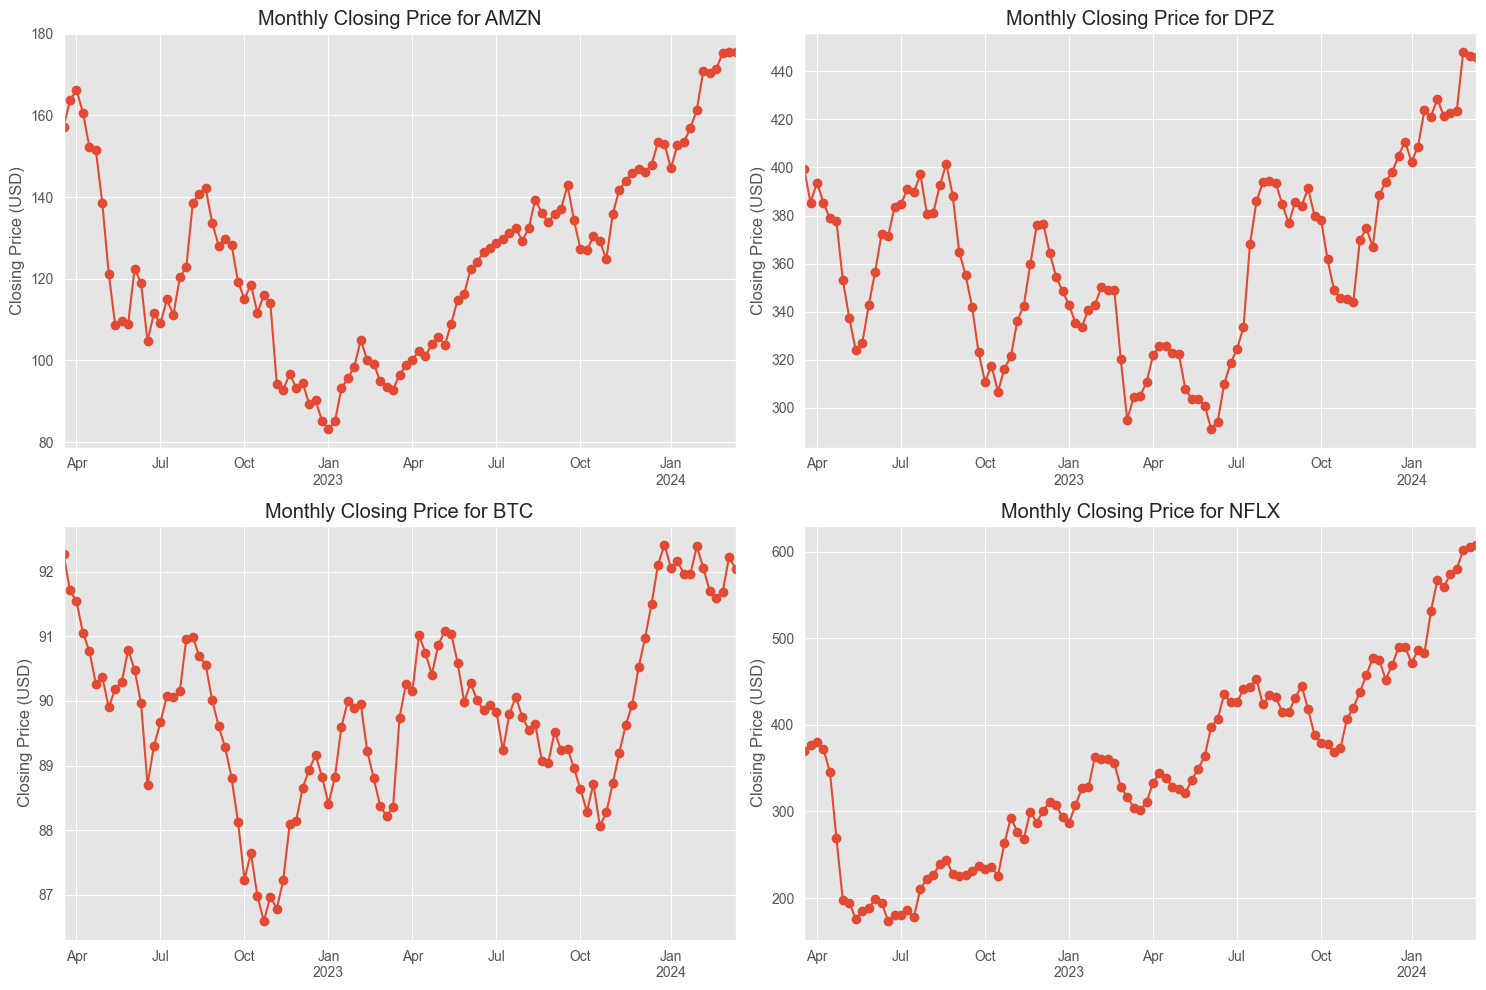

In [26]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    weekly_data = company['Adj Close'].resample('W').mean() # Resample the data to get weekly averages
    weekly_data.plot(marker='o', linestyle='-')
    plt.title(f'Monthly Closing Price for {stocks_list[i - 1]}')
    plt.xlabel(None)
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)

plt.tight_layout() 

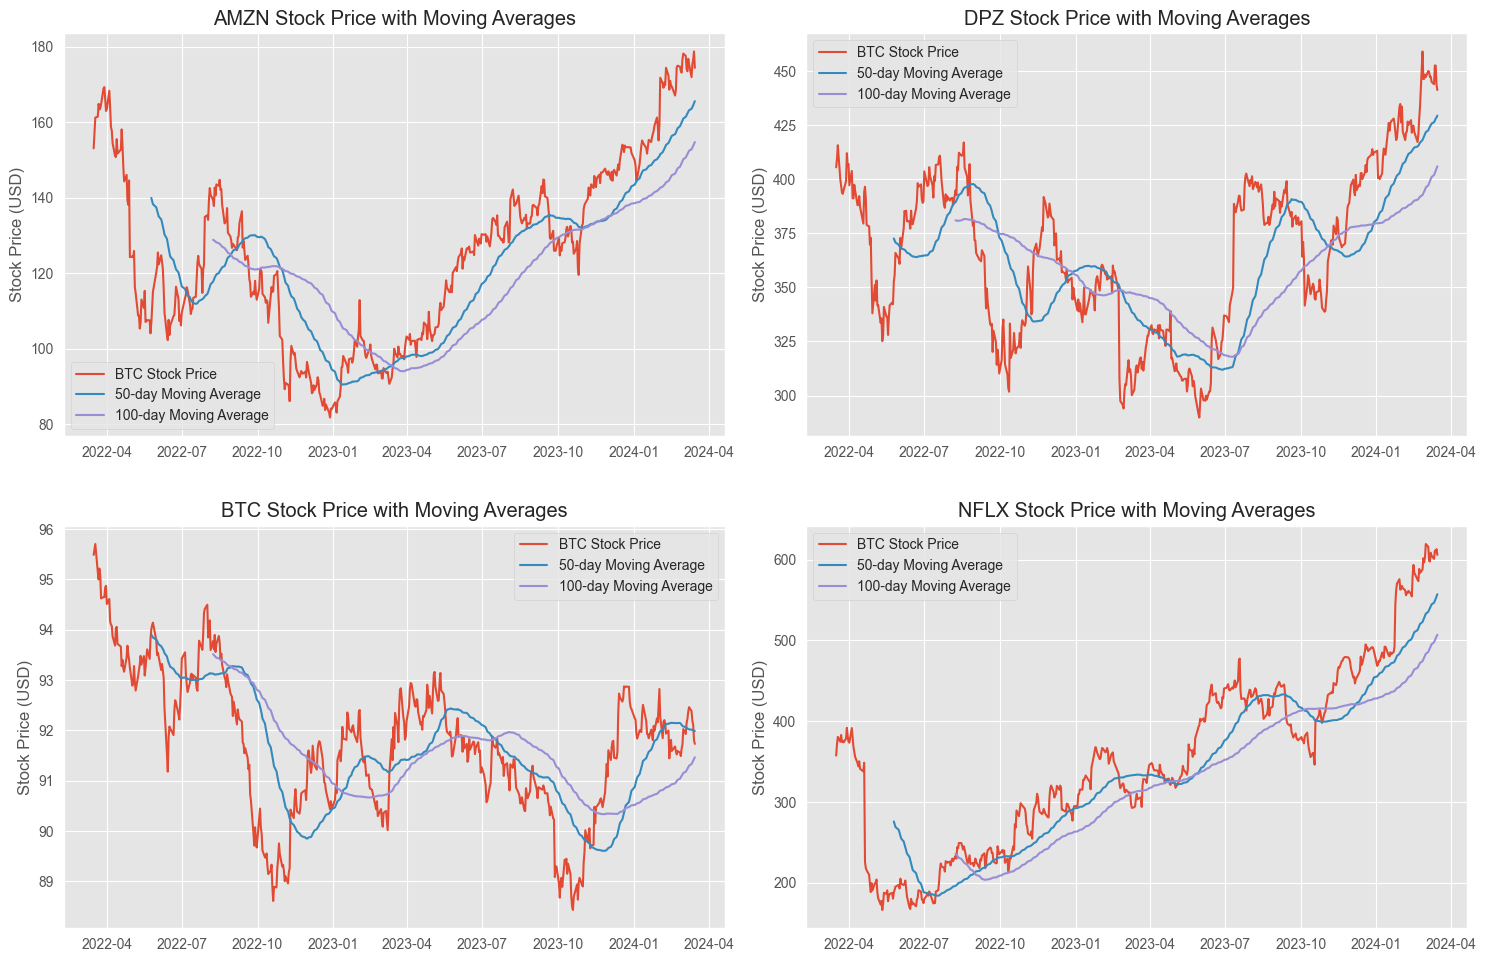

In [27]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    
    company['MA50'] = company['Close'].rolling(window=50).mean()
    company['MA100'] = company['Close'].rolling(window=100).mean()
    
    plt.plot(company['Close'], label='BTC Stock Price')
    plt.plot(company['MA50'], label='50-day Moving Average')
    plt.plot(company['MA100'], label='100-day Moving Average')
    plt.title(f'{stocks_list[i - 1]} Stock Price with Moving Averages')
    plt.xlabel(None)
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

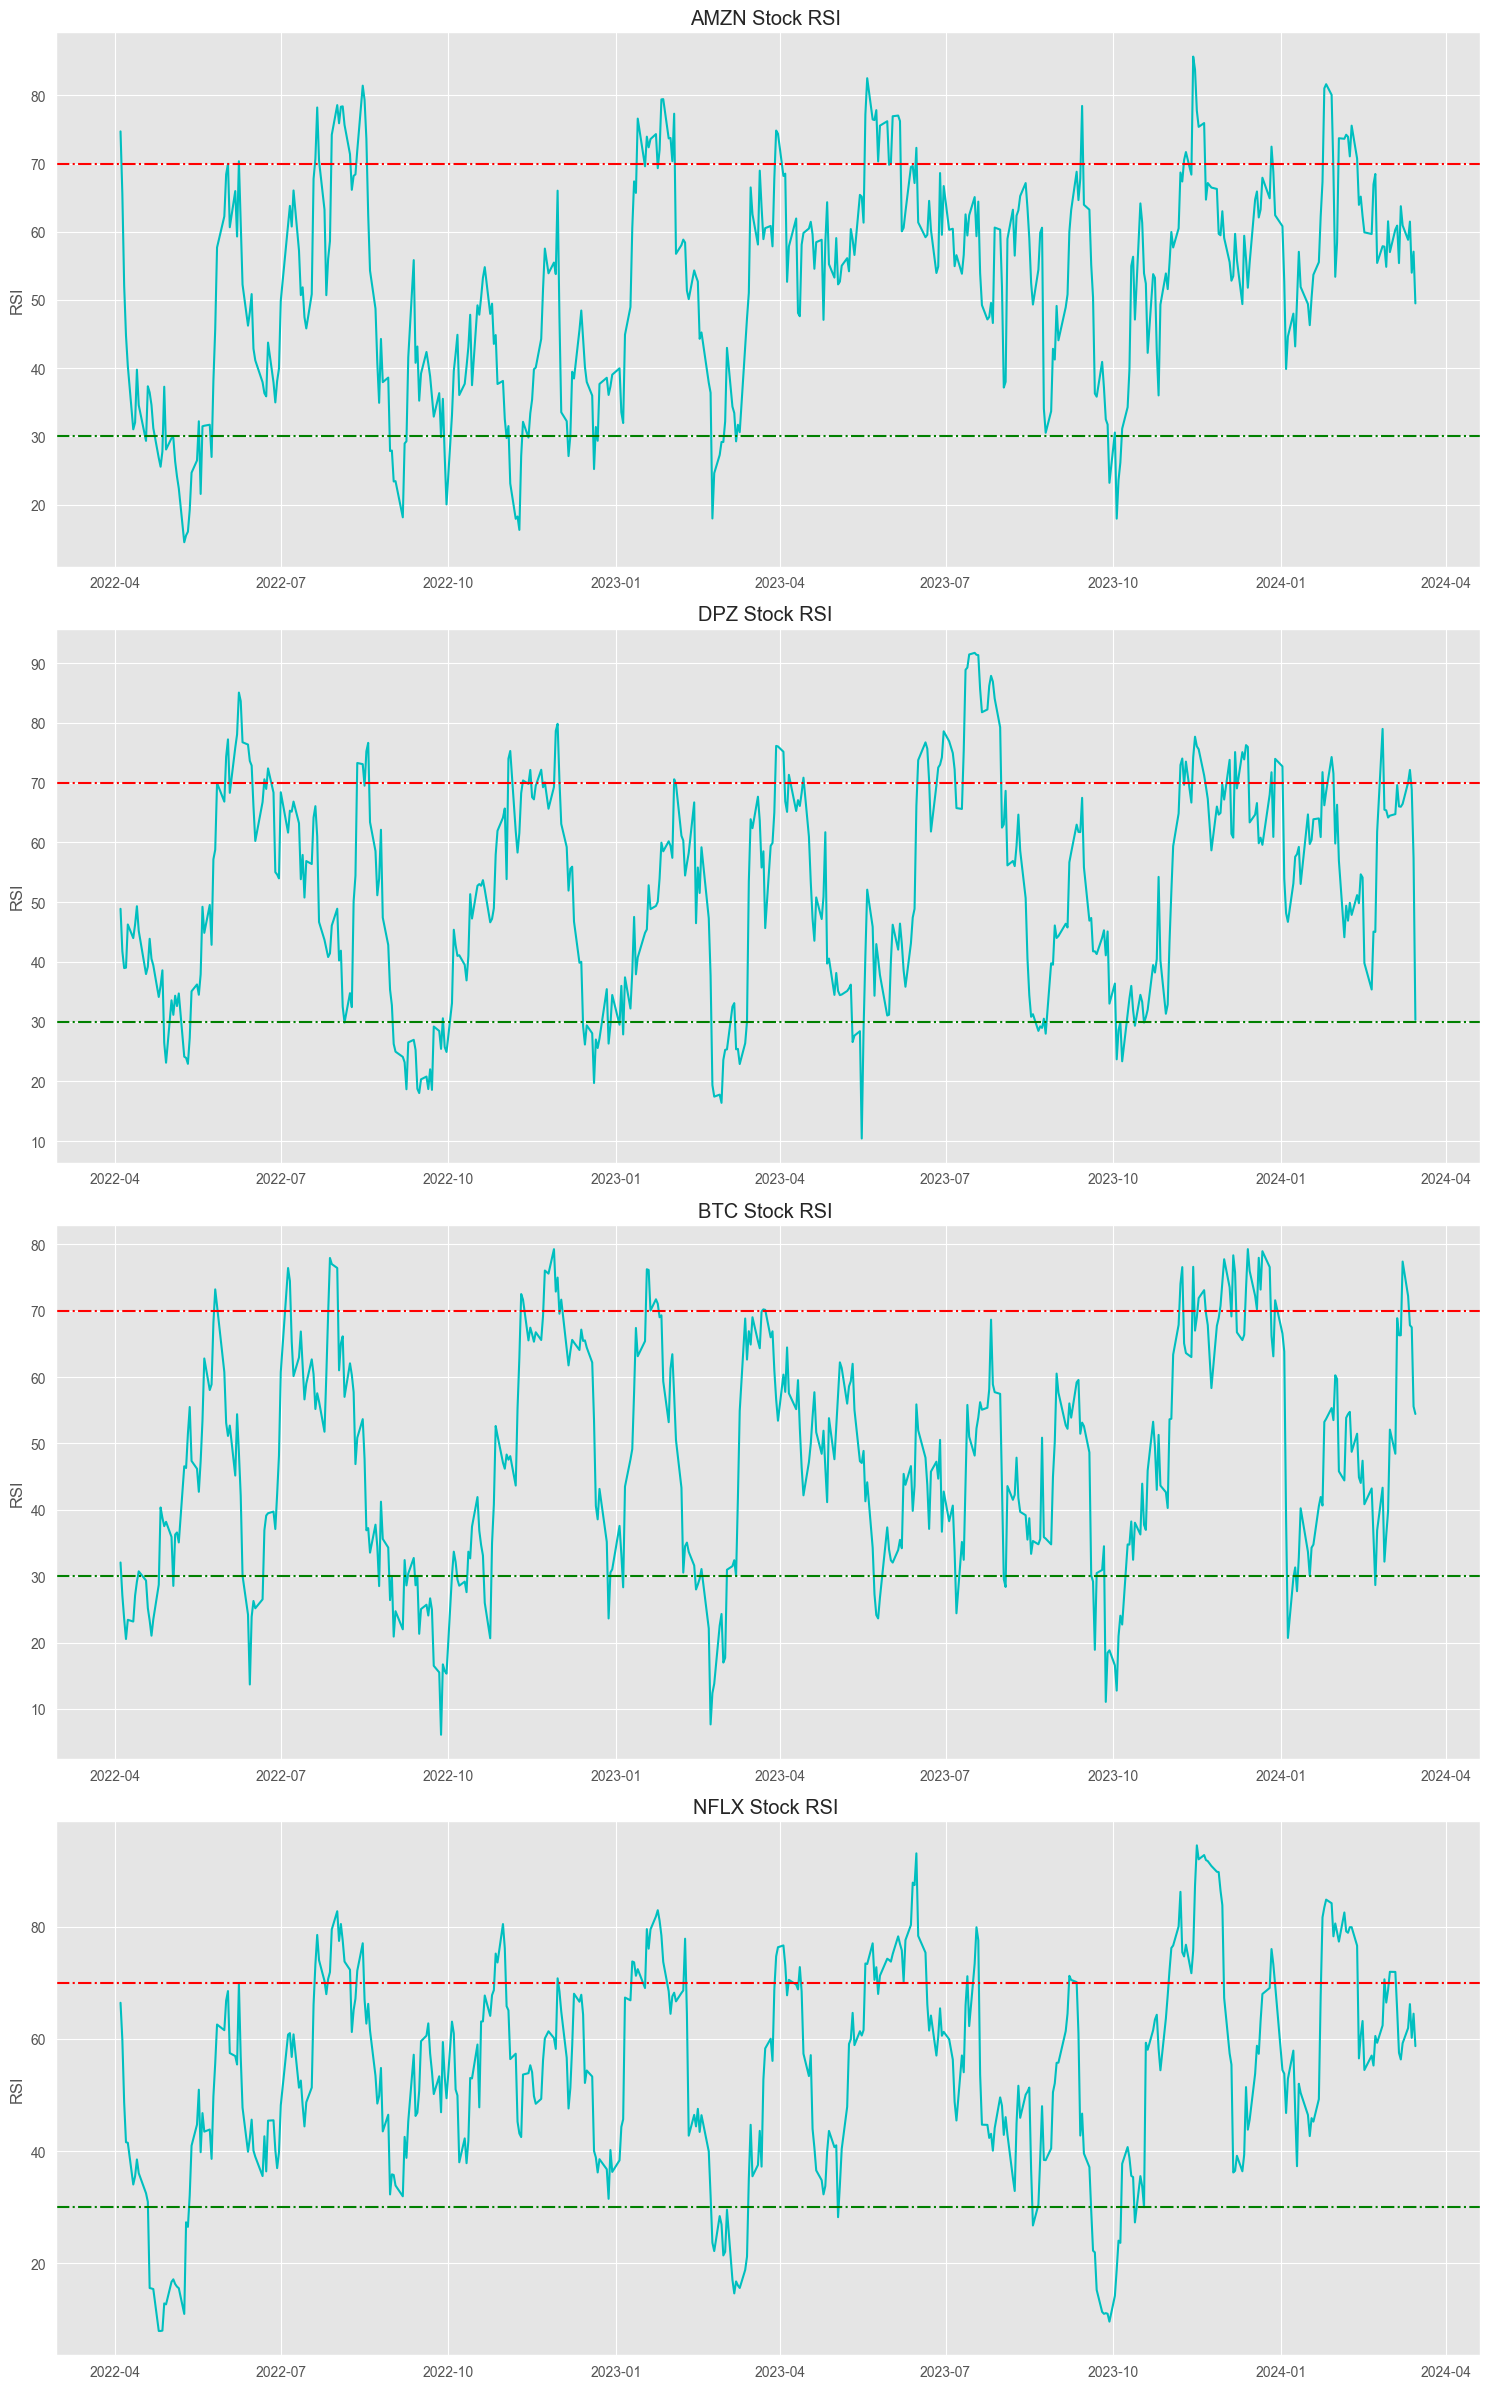

In [28]:
plt.figure(figsize=(15, 24))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)
    
    
    company['Daily Change'] = company['Close'].diff()

    
    period = 14    

    
    company['Gain'] = company['Daily Change'].apply(lambda x: x if x > 0 else 0)
    company['Loss'] = company['Daily Change'].apply(lambda x: -x if x< 0 else 0)
    company['Average Gain'] = company['Gain'].rolling(window=period).mean()
    company['Average Loss'] = company['Loss'].rolling(window=period).mean()

    company['RS'] = company['Average Gain'] / company['Average Loss']

    
    company['RSI'] = 100 - (100 / (1 + company['RS']))


    plt.plot(company.index, company['RSI'], label=f'{stocks_list[i - 1]} RSI', color='c')
    plt.axhline(y=70, color='r', linestyle='dashdot')
    plt.axhline(y=30, color='g', linestyle='dashdot')
    plt.title(f'{stocks_list[i - 1]} Stock RSI ')
    plt.xlabel(None)
    plt.ylabel('RSI')

plt.tight_layout()
plt.show()

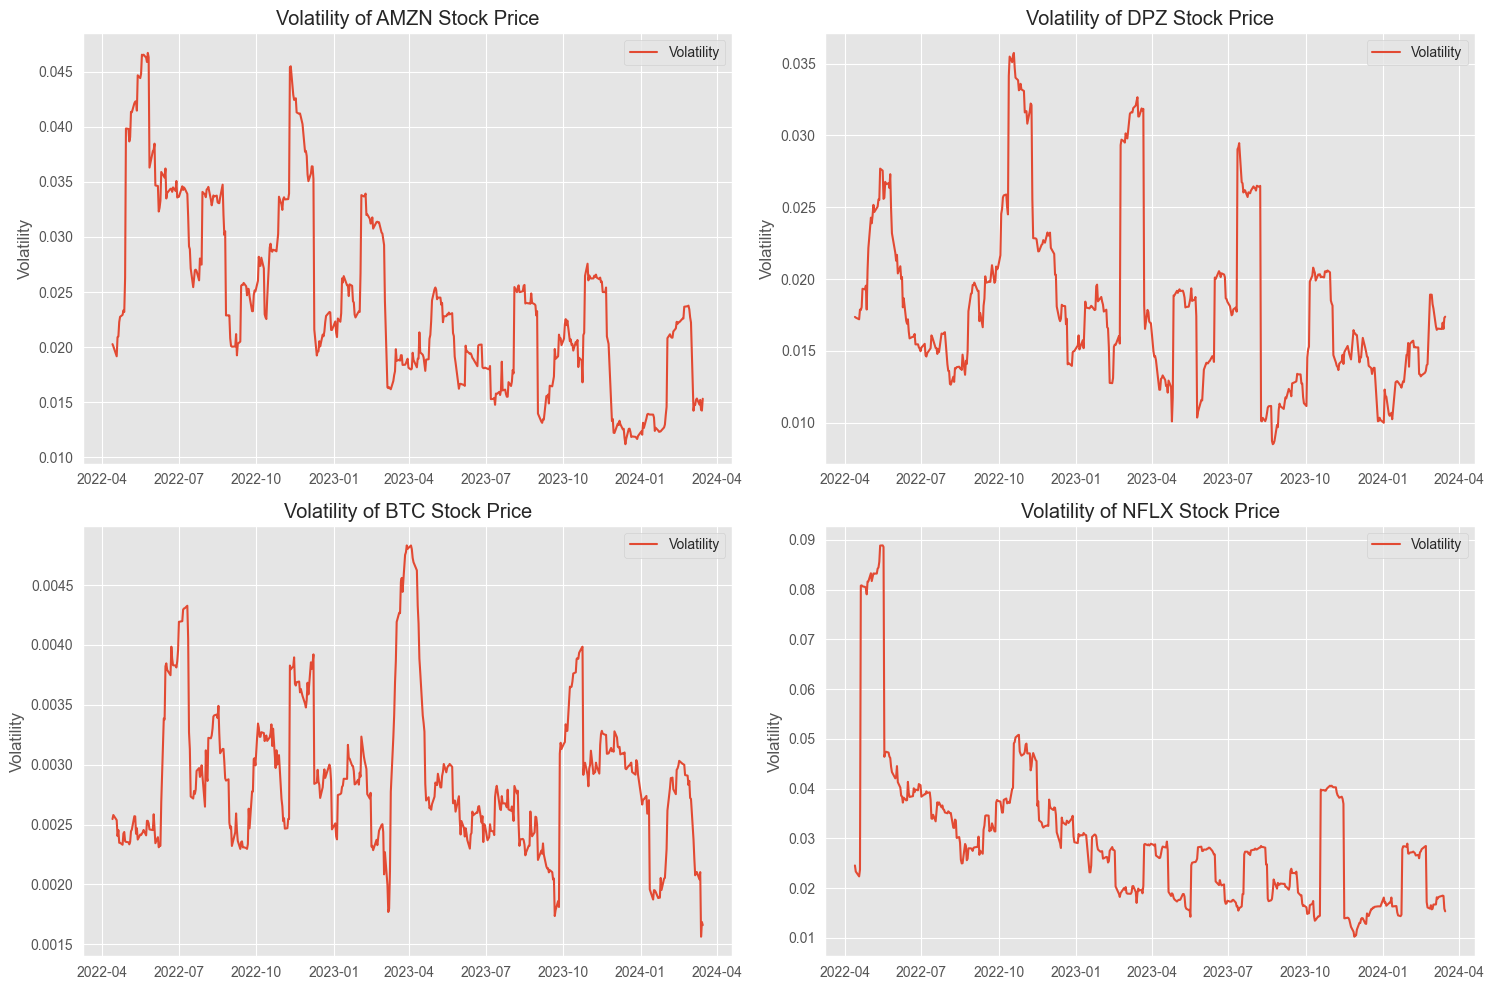

In [29]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volatility'] = company['Close'].pct_change().rolling(window=20).std()
    plt.plot(company['Volatility'], label='Volatility')
    plt.title(f'Volatility of {stocks_list[i - 1]} Stock Price')
    plt.xlabel(None)
    plt.ylabel('Volatility')
    plt.grid(True)
    plt.legend()


plt.tight_layout() 
plt.show()


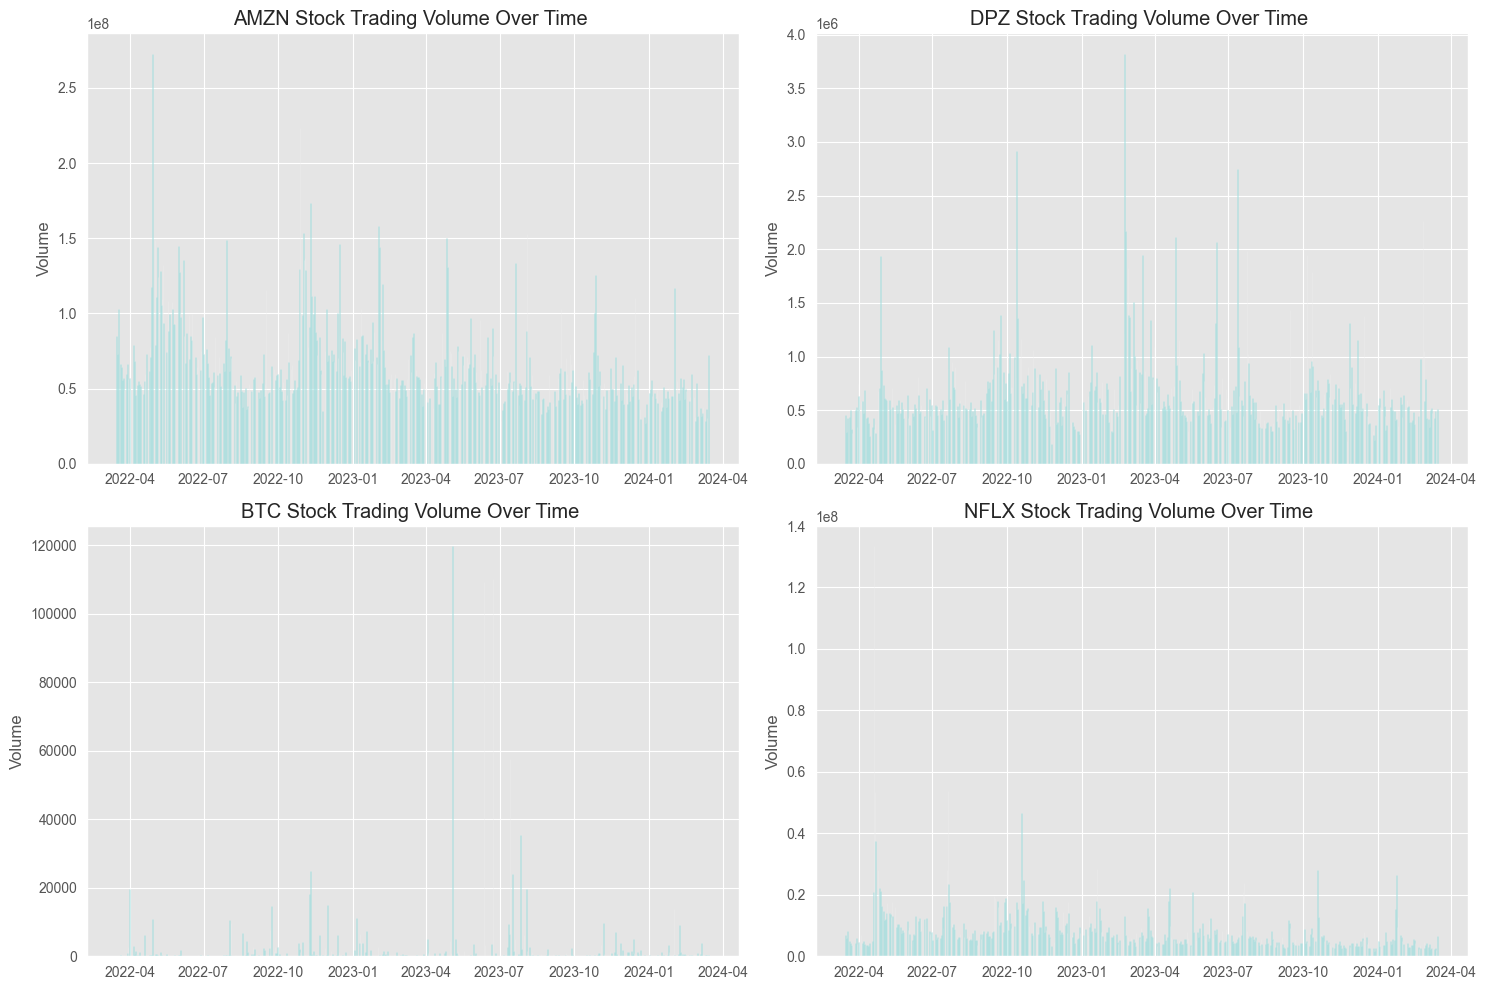

In [30]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)    
    plt.bar(company.index, company['Volume'], color='c', alpha=0.5)
    plt.title(f'{stocks_list[i - 1]} Stock Trading Volume Over Time ')
    plt.xlabel(None)
    plt.ylabel('Volume')
    plt.grid(True)

plt.tight_layout()  
plt.show()

In [31]:
sharpe_ratios = []
stock_names = []

# Calculate Sharpe Ratio for each company
for i, company in enumerate(company_list, 1):
    company['Daily Returns'] = company['Close'].pct_change()
    sharpe_ratio = np.sqrt(252) * (company['Daily Returns'].mean() / company['Daily Returns'].std())
    print(f"Sharpe Ratio for {stocks_list[i - 1]}: {sharpe_ratio}")
    sharpe_ratios.append(sharpe_ratio)
    stock_names.append(stocks_list[i - 1])

Sharpe Ratio for AMZN: 0.36391552084590895
Sharpe Ratio for DPZ: 0.29105518840511596
Sharpe Ratio for BTC: -0.40824042113743647
Sharpe Ratio for NFLX: 0.7839694857801283


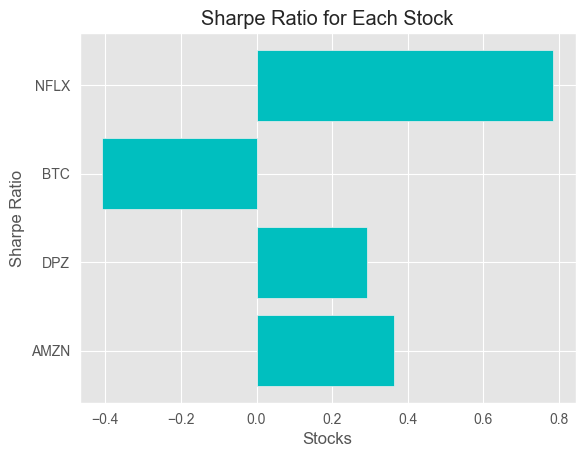

In [32]:
plt.barh(stock_names, sharpe_ratios, color='c') 
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio for Each Stock')
plt.show()